# **#PIA INTELIGENCIA ARTIFICIAL**
**Equipo 1**

* Daniela Morales Leal                    1877360
* Jesús Alejandro Júárez González         1618144
* Jordy Fabían Rodriguez Hinojosa         1797386
* Paola Azeneth Castillo Gutierrez        1846953
* Joel González García                    1870313

####Importar TensorFlow

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
import keras
from keras.layers.advanced_activations import LeakyReLU
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')

train_images, test_images = train_images/255.0, test_images/255.0



169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
print(np.array(train_labels))

[[11]
 [15]
 [ 4]
 ...
 [ 8]
 [ 7]
 [ 1]]


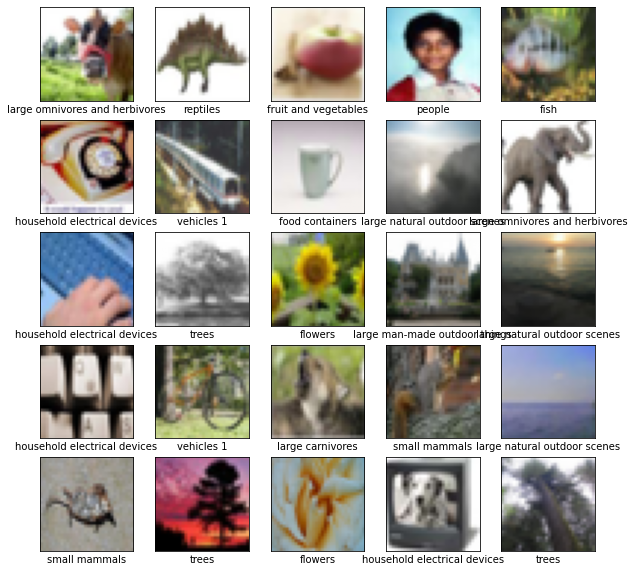

In [ ]:
class_names = ['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables','household electrical devices', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]]) #aquí se realiza el cambio del valor númerico del arreglo a su valor string
plt.show()

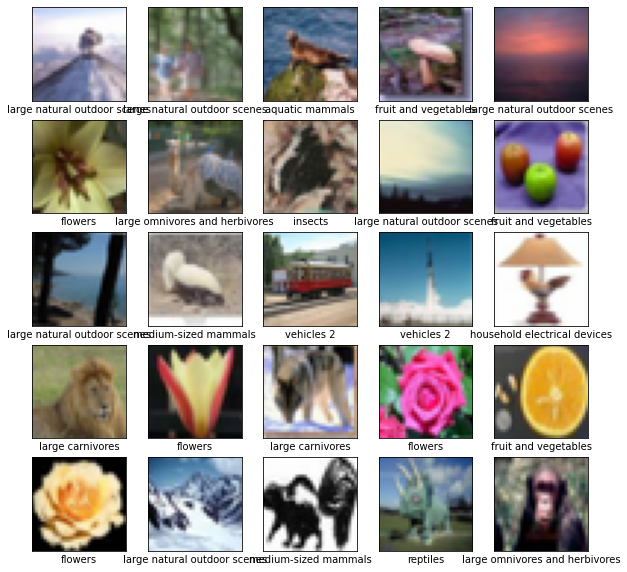

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [ ]:

model = models.Sequential()

model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())



In [ ]:

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(20, activation='softmax'))

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)

tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, name="Adamax")

model.compile(optimizer='Adamax',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=20, callbacks = [early_stop, rlrop],
                    verbose=1, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/20
782/782 [==============================] - 50s 63ms/step - loss: 45.3279 - accuracy: 0.1549 - val_loss: 8.4146 - val_accuracy: 0.1509 - lr: 0.0010
Epoch 2/20
782/782 [==============================] - 48s 61ms/step - loss: 7.2965 - accuracy: 0.2162 - val_loss: 7.0665 - val_accuracy: 0.2115 - lr: 0.0010
Epoch 3/20
782/782 [==============================] - 48s 62ms/step - loss: 6.7149 - accuracy: 0.2804 - val_loss: 6.6558 - val_accuracy: 0.2887 - lr: 0.0010
Epoch 4/20
782/782 [==============================] - 48s 62ms/step - loss: 6.6533 - accuracy: 0.3413 - val_loss: 6.9235 - val_accuracy: 0.3622 - lr: 0.0010
Epoch 5/20
782/782 [==============================] - 49s 62ms/step - loss: 7.0863 - accuracy: 0.3773 - val_loss: 7.2306 - val_accuracy: 0.3772 - lr: 0.0010
Epoch 6/20
782/782 [==============================] - 49s 62ms/step - loss: 7.1942 - accuracy: 0.4049 - val_loss: 7.3123 - val_accuracy: 0.3959 - lr: 0.0010
Epoch 7/20
782/782 [==============================] - 48s

####Evaluar el modelo

313/313 - 4s - loss: 4.7343 - accuracy: 0.5071 - 4s/epoch - 14ms/step


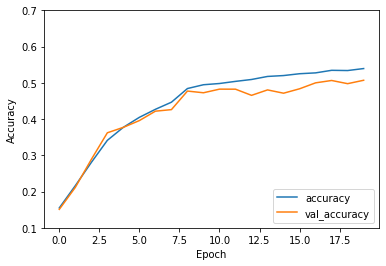

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.7])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

####Precisión

In [ ]:
print(test_acc)

0.507099986076355
